In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dropout,Dense,LSTM
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv("/users/yipengwei/Desktop/Deep Learning 6289/HW3/Homework3/TSLA.csv")
df.head(30)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000
5,2015-07-17,54.500000,55.108002,53.650002,54.931999,54.931999,25020500
6,2015-07-20,55.000000,57.330002,54.507999,56.452000,56.452000,24892500
7,2015-07-21,54.009998,54.700001,53.310001,53.354000,53.354000,30543500
8,2015-07-22,52.254002,53.888000,52.172001,53.574001,53.574001,15525000
9,2015-07-23,53.930000,53.980000,53.054001,53.439999,53.439999,11136000


In [3]:
df.tail(30)

,Date,Open,High,Low,Close,Adj Close,Volume
1229,2020-05-28,162.701996,164.949997,160.337997,161.162003,161.162003,36278000
1230,2020-05-29,161.750000,167.000000,160.841995,167.000000,167.000000,58822500
1231,2020-06-01,171.600006,179.800003,170.820007,179.619995,179.619995,74697500
1232,2020-06-02,178.940002,181.731995,174.199997,176.311996,176.311996,67828000
1233,2020-06-03,177.623993,179.587997,176.020004,176.591995,176.591995,39747500
1234,2020-06-04,177.975998,179.149994,171.688004,172.876007,172.876007,44438500
1235,2020-06-05,175.567993,177.304001,173.240005,177.132004,177.132004,39059500
1236,2020-06-08,183.800003,190.000000,181.832001,189.983994,189.983994,70873500
1237,2020-06-09,188.001999,190.888000,184.785995,188.134003,188.134003,56941000
1238,2020-06-10,198.376007,205.496002,196.500000,205.009995,205.009995,92817000


In [4]:
#Split data into 900 training data and 359 test data
n = df.shape[0]
n_train = 900

#We are interested in adjusted close stock price
df_train = df.head(n_train)["Adj Close"].values
df_test = df.tail(len(df) - n_train)["Adj Close"].values

print(df_train[:30])
print(df_test[:30])

[51.830002 52.431999 53.130001 52.627998 53.335999 54.931999 56.452
 53.354    53.574001 53.439999 53.082001 50.602001 52.964001 52.764
 53.358002 53.23     51.998001 53.256001 54.026001 49.226002 48.501999
 48.228001 47.473999 47.633999 48.501999 48.630001 50.998001 52.144001
 51.049999 48.436001]
[63.444    61.501999 61.16     62.568001 62.362    61.633999 60.754002
 61.576    61.127998 60.512001 58.245998 58.942001 59.754002 59.571999
 62.948002 63.976002 58.958    57.071999 55.307999 55.248001 55.318001
 56.827999 58.183998 56.672001 57.792    57.992001 55.085999 53.897999
 53.493999 54.720001]


In [5]:
#Preprocessing step: training data standardization 
df_train = df_train.reshape(-1, 1)

standardize = MinMaxScaler(feature_range = (0, 1)) 
df_train = standardize.fit_transform(df_train)

In [6]:
#Lag 1 data input
lag=1
sample=30

x_train_lag1 = []
y_train_lag1 = []
for i in range(n_train-sample-lag+1):
    x_train_lag1.append(df_train[i:i+sample])
    y_train_lag1.append(df_train[i+sample:i+sample+lag])

x_train_lag1 = np.array(x_train_lag1)
y_train_lag1 = np.array(y_train_lag1)

x_train_lag1 = np.reshape(x_train_lag1, (x_train_lag1.shape[0], sample, 1))
y_train_lag1 = np.reshape(y_train_lag1, (y_train_lag1.shape[0], lag, 1))

#input units are 
#x0 0~29 y0 30
#x0 1~30 y0 31
#...

In [7]:
#Lag 7 data input
lag=7
sample=30

x_train_lag7 = []
y_train_lag7 = []
for i in range(n_train-sample-lag+1):
    x_train_lag7.append(df_train[i:i+sample])
    y_train_lag7.append(df_train[i+sample:i+sample+lag])

x_train_lag7 = np.array(x_train_lag7)
y_train_lag7 = np.array(y_train_lag7)

x_train_lag7 = np.reshape(x_train_lag7, (x_train_lag7.shape[0], sample, 1))
y_train_lag7 = np.reshape(y_train_lag7, (y_train_lag7.shape[0], lag, 1))

#input units are 
#x0 0~29 y0 30~36
#x1 1~30 y1 31~37
#...

In [8]:
#Lag 14 data input
lag=14
sample=30

x_train_lag14 = []
y_train_lag14 = []
for i in range(n_train-sample-lag+1):
    x_train_lag14.append(df_train[i:i+sample])
    y_train_lag14.append(df_train[i+sample:i+sample+lag])

x_train_lag14 = np.array(x_train_lag14)
y_train_lag14 = np.array(y_train_lag14)

x_train_lag14 = np.reshape(x_train_lag14, (x_train_lag14.shape[0], sample, 1))
y_train_lag14 = np.reshape(y_train_lag14, (y_train_lag14.shape[0], lag, 1))
#input units are 
#x0 0~29 y0 30~43
#x1 1~30 y1 31~44
#...

In [9]:
#4 layers LSTM with 50 units
#Lag 1

model_lag1 = Sequential()
#Adding first LSTM layer
model_lag1.add(LSTM(units = 50, return_sequences = True, input_shape = (sample, 1))) 
model_lag1.add(Dropout(0.2))
# Adding second LSTM layer
model_lag1.add(LSTM(units = 50, return_sequences = True))
model_lag1.add(Dropout(0.2))
# Adding third LSTM layer
model_lag1.add(LSTM(units = 50, return_sequences = True))
model_lag1.add(Dropout(0.2))
# Adding fourth LSTM layer
model_lag1.add(LSTM(units = 50))
model_lag1.add(Dropout(0.2))
# Adding the output layer
model_lag1.add(Dense(units = 1))
# Compiling LSTM
model_lag1.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting LSTM to the Training set
model_lag1.fit(x_train_lag1, y_train_lag1, epochs = 100, batch_size = 32)

Epoch 1/100
28/28 [==============================] - 3s 18ms/step - loss: 0.0519
Epoch 2/100
28/28 [==============================] - 0s 17ms/step - loss: 0.0152
Epoch 3/100
28/28 [==============================] - 0s 17ms/step - loss: 0.0127
Epoch 4/100
28/28 [==============================] - 0s 17ms/step - loss: 0.0130
Epoch 5/100
28/28 [==============================] - 0s 17ms/step - loss: 0.0132
Epoch 6/100
28/28 [==============================] - 0s 17ms/step - loss: 0.0112
Epoch 7/100
28/28 [==============================] - 0s 18ms/step - loss: 0.0120
Epoch 8/100
28/28 [==============================] - 0s 18ms/step - loss: 0.0108
Epoch 9/100
28/28 [==============================] - 0s 18ms/step - loss: 0.0110
Epoch 10/100
28/28 [==============================] - 0s 17ms/step - loss: 0.0123
Epoch 11/100
28/28 [==============================] - 1s 18ms/step - loss: 0.0108
Epoch 12/100
28/28 [==============================] - 1s 18ms/step - loss: 0.0098
Epoch 13/100
28/28 [=====

In [10]:
#4 layers LSTM with 50 units
#Lag 7

model_lag7 = Sequential()
#Adding first LSTM layer
model_lag7.add(LSTM(units = 50, return_sequences = True, input_shape = (sample, 1))) 
model_lag7.add(Dropout(0.2))
# Adding second LSTM layer
model_lag7.add(LSTM(units = 50, return_sequences = True))
model_lag7.add(Dropout(0.2))
# Adding third LSTM layer
model_lag7.add(LSTM(units = 50, return_sequences = True))
model_lag7.add(Dropout(0.2))
# Adding fourth LSTM layer
model_lag7.add(LSTM(units = 50))
model_lag7.add(Dropout(0.2))
# Adding the output layer
model_lag7.add(Dense(units = 7))
# Compiling LSTM
model_lag7.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting LSTM to the Training set
model_lag7.fit(x_train_lag7, y_train_lag7, epochs = 100, batch_size = 32)

Epoch 1/100
27/27 [==============================] - 2s 15ms/step - loss: 0.0933
Epoch 2/100
27/27 [==============================] - 0s 14ms/step - loss: 0.0268
Epoch 3/100
27/27 [==============================] - 0s 13ms/step - loss: 0.0236
Epoch 4/100
27/27 [==============================] - 0s 14ms/step - loss: 0.0216
Epoch 5/100
27/27 [==============================] - 0s 14ms/step - loss: 0.0205
Epoch 6/100
27/27 [==============================] - 0s 14ms/step - loss: 0.0214
Epoch 7/100
27/27 [==============================] - 0s 15ms/step - loss: 0.0194
Epoch 8/100
27/27 [==============================] - 0s 15ms/step - loss: 0.0173
Epoch 9/100
27/27 [==============================] - 0s 15ms/step - loss: 0.0178
Epoch 10/100
27/27 [==============================] - 0s 15ms/step - loss: 0.0163
Epoch 11/100
27/27 [==============================] - 0s 14ms/step - loss: 0.0152
Epoch 12/100
27/27 [==============================] - 0s 14ms/step - loss: 0.0163
Epoch 13/100
27/27 [=====

In [11]:
#4 layers LSTM with 50 units
#Lag 14

model_lag14_1 = Sequential()
#Adding first LSTM layer
model_lag14_1.add(LSTM(units = 50, return_sequences = True, input_shape = (sample, 1))) 
model_lag14_1.add(Dropout(0.2))
# Adding second LSTM layer 
model_lag14_1.add(LSTM(units = 50, return_sequences = True))
model_lag14_1.add(Dropout(0.2))
# Adding third LSTM layer
model_lag14_1.add(LSTM(units = 50, return_sequences = True))
model_lag14_1.add(Dropout(0.2))
# Adding fourth LSTM layer
model_lag14_1.add(LSTM(units = 50))
model_lag14_1.add(Dropout(0.2))
# Adding the output layer
model_lag14_1.add(Dense(units = 14))
# Compiling LSTM
model_lag14_1.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting LSTM to the Training set
model_lag14_1.fit(x_train_lag14, y_train_lag14, epochs = 100, batch_size = 32)

Epoch 1/100
27/27 [==============================] - 3s 18ms/step - loss: 0.1401
Epoch 2/100
27/27 [==============================] - 0s 17ms/step - loss: 0.0334
Epoch 3/100
27/27 [==============================] - 0s 17ms/step - loss: 0.0290
Epoch 4/100
27/27 [==============================] - 0s 17ms/step - loss: 0.0266
Epoch 5/100
27/27 [==============================] - 0s 17ms/step - loss: 0.0262
Epoch 6/100
27/27 [==============================] - 0s 17ms/step - loss: 0.0223
Epoch 7/100
27/27 [==============================] - 0s 17ms/step - loss: 0.0227
Epoch 8/100
27/27 [==============================] - 0s 17ms/step - loss: 0.0220
Epoch 9/100
27/27 [==============================] - 0s 17ms/step - loss: 0.0209
Epoch 10/100
27/27 [==============================] - 0s 17ms/step - loss: 0.0199
Epoch 11/100
27/27 [==============================] - 0s 17ms/step - loss: 0.0182
Epoch 12/100
27/27 [==============================] - 0s 17ms/step - loss: 0.0178
Epoch 13/100
27/27 [=====

In [12]:
#6 layers LSTM with 50 units
#Lag 14

model_lag14_2 = Sequential()
#Adding first LSTM layer 
model_lag14_2.add(LSTM(units = 50, return_sequences = True, input_shape = (sample, 1))) 
model_lag14_2.add(Dropout(0.2))
# Adding second LSTM layer
model_lag14_2.add(LSTM(units = 50, return_sequences = True))
model_lag14_2.add(Dropout(0.2))
# Adding third LSTM layer
model_lag14_2.add(LSTM(units = 50, return_sequences = True))
model_lag14_2.add(Dropout(0.2))
# Adding fourth LSTM layer
model_lag14_2.add(LSTM(units = 50, return_sequences = True))
model_lag14_2.add(Dropout(0.2))
# Adding fifth LSTM layer
model_lag14_2.add(LSTM(units = 50, return_sequences = True))
model_lag14_2.add(Dropout(0.2))
# Adding sixth LSTM layer
model_lag14_2.add(LSTM(units = 50))
model_lag14_2.add(Dropout(0.2))
# Adding output layer
model_lag14_2.add(Dense(units = 14))
# Compiling LSTM
model_lag14_2.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting LSTM to the Training set
model_lag14_2.fit(x_train_lag14, y_train_lag14, epochs = 100, batch_size = 32)

Epoch 1/100
27/27 [==============================] - 4s 27ms/step - loss: 0.1381
Epoch 2/100
27/27 [==============================] - 1s 26ms/step - loss: 0.0339
Epoch 3/100
27/27 [==============================] - 1s 25ms/step - loss: 0.0285
Epoch 4/100
27/27 [==============================] - 1s 26ms/step - loss: 0.0271
Epoch 5/100
27/27 [==============================] - 1s 27ms/step - loss: 0.0265
Epoch 6/100
27/27 [==============================] - 1s 27ms/step - loss: 0.0249
Epoch 7/100
27/27 [==============================] - 1s 26ms/step - loss: 0.0225
Epoch 8/100
27/27 [==============================] - 1s 27ms/step - loss: 0.0213
Epoch 9/100
27/27 [==============================] - 1s 27ms/step - loss: 0.0215
Epoch 10/100
27/27 [==============================] - 1s 27ms/step - loss: 0.0214
Epoch 11/100
27/27 [==============================] - 1s 27ms/step - loss: 0.0185
Epoch 12/100
27/27 [==============================] - 1s 26ms/step - loss: 0.0181
Epoch 13/100
27/27 [=====

In [13]:
#4 layers LSTM with 100 units
#Lag 14

model_lag14_3 = Sequential()
#Adding first LSTM layer 
model_lag14_3.add(LSTM(units = 100, return_sequences = True, input_shape = (sample, 1))) 
model_lag14_3.add(Dropout(0.2))
# Adding second LSTM layer
model_lag14_3.add(LSTM(units = 100, return_sequences = True))
model_lag14_3.add(Dropout(0.2))
# Adding third LSTM layer
model_lag14_3.add(LSTM(units = 100, return_sequences = True))
model_lag14_3.add(Dropout(0.2))
# Adding fourth LSTM layer
model_lag14_3.add(LSTM(units = 100))
model_lag14_3.add(Dropout(0.2))
# Adding output layer
model_lag14_3.add(Dense(units = 14))
# Compiling LSTM
model_lag14_3.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting LSTM to the Training set
model_lag14_3.fit(x_train_lag14, y_train_lag14, epochs = 100, batch_size = 32)

Epoch 1/100
27/27 [==============================] - 4s 36ms/step - loss: 0.0902
Epoch 2/100
27/27 [==============================] - 1s 36ms/step - loss: 0.0257
Epoch 3/100
27/27 [==============================] - 1s 37ms/step - loss: 0.0223
Epoch 4/100
27/27 [==============================] - 1s 39ms/step - loss: 0.0204
Epoch 5/100
27/27 [==============================] - 1s 40ms/step - loss: 0.0201
Epoch 6/100
27/27 [==============================] - 1s 40ms/step - loss: 0.0186
Epoch 7/100
27/27 [==============================] - 1s 40ms/step - loss: 0.0184
Epoch 8/100
27/27 [==============================] - 1s 40ms/step - loss: 0.0171
Epoch 9/100
27/27 [==============================] - 1s 40ms/step - loss: 0.0165
Epoch 10/100
27/27 [==============================] - 1s 40ms/step - loss: 0.0158
Epoch 11/100
27/27 [==============================] - 1s 40ms/step - loss: 0.0162
Epoch 12/100
27/27 [==============================] - 1s 40ms/step - loss: 0.0160
Epoch 13/100
27/27 [=====

In [14]:
#The first prediction will be based on the last 30 training data, so we combined them into test data

x_test_pre = df.tail(len(df)-n_train+sample)["Adj Close"].values

#Preprocessing step: test data standardization 
x_test_pre = x_test_pre.reshape(-1, 1)
standardize = MinMaxScaler(feature_range = (0, 1)) 
x_test_pre = standardize.fit_transform(x_test_pre)

x_test = []
for i in range(len(x_test_pre)-sample+1):
    x_test.append(x_test_pre[i:i+sample])
x_test = np.array(x_test) 
x_test = np.reshape(x_test, (x_test.shape[0], sample, 1))

In [15]:
#Prediction by using lag 1 model
predicted_lag1 = model_lag1.predict(x_test)
predicted_lag1 = standardize.inverse_transform(predicted_lag1)

12/12 [==============================] - 1s 4ms/step


In [16]:
#Prediction by using lag 7 model
predicted_lag7_pre = model_lag7.predict(x_test)
predicted_lag7_pre = standardize.inverse_transform(predicted_lag7_pre)

#There are 7 output for each time point, we used the first output for predicted value for the test data
predicted_lag7 = np.concatenate((predicted_lag7_pre[:,0],predicted_lag7_pre[-1,1:]))

12/12 [==============================] - 1s 4ms/step


In [17]:
#Prediction by using lag 14 model1
predicted_lag14_pre_1 = model_lag14_1.predict(x_test)
predicted_lag14_pre_1 = standardize.inverse_transform(predicted_lag14_pre_1)

#There are 14 output for each time point, we used the first output for predicted value for the test data
predicted_lag14_1 = np.concatenate((predicted_lag14_pre_1[:,0],predicted_lag14_pre_1[-1,1:]))


12/12 [==============================] - 1s 4ms/step


In [18]:
#Prediction by using lag 14 model2
predicted_lag14_pre_2 = model_lag14_2.predict(x_test)
predicted_lag14_pre_2 = standardize.inverse_transform(predicted_lag14_pre_2)

#There are 14 output for each time point, we used the first output for predicted value for the test data
predicted_lag14_2 = np.concatenate((predicted_lag14_pre_2[:,0],predicted_lag14_pre_2[-1,1:]))


12/12 [==============================] - 1s 6ms/step


In [19]:
#Prediction by using lag 14 model3
predicted_lag14_pre_3 = model_lag14_3.predict(x_test)
predicted_lag14_pre_3 = standardize.inverse_transform(predicted_lag14_pre_3)

#There are 14 output for each time point, we used the first output for predicted value for the test data
predicted_lag14_3 = np.concatenate((predicted_lag14_pre_3[:,0],predicted_lag14_pre_3[-1,1:]))


12/12 [==============================] - 1s 11ms/step


In [20]:
#Date for test data
df_test_date = df.tail(len(df)-n_train)["Date"].values

#Date for future 1 day, 1 week and 2 weeks
date_lag1 = np.concatenate((df_test_date, ["2020-07-10"]))
date_lag7 = np.concatenate((df_test_date, ["2020-07-10","2020-07-13","2020-07-14","2020-07-15","2020-07-16","2020-07-17","2020-07-20"]))
date_lag14 = np.concatenate((df_test_date, ["2020-07-10","2020-07-13","2020-07-14","2020-07-15","2020-07-16","2020-07-17","2020-07-20","2020-07-21","2020-07-22","2020-07-23","2020-07-24","2020-07-27","2020-07-28","2020-07-29"]))



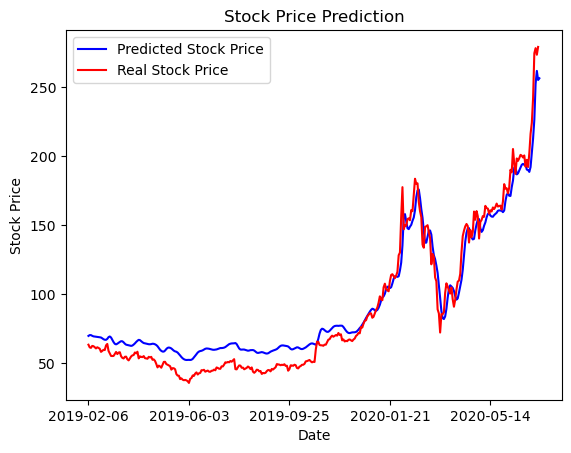

In [21]:
#Plot of prediction using model lag 1
plt.plot(date_lag1, predicted_lag1, color = "blue", label = "Predicted Stock Price")
plt.plot(df_test_date, df_test, color = "red", label = "Real Stock Price") 
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.xticks(np.arange(0,x_test.shape[0],80))
plt.ylabel('Stock Price')
plt.legend()
plt.show()

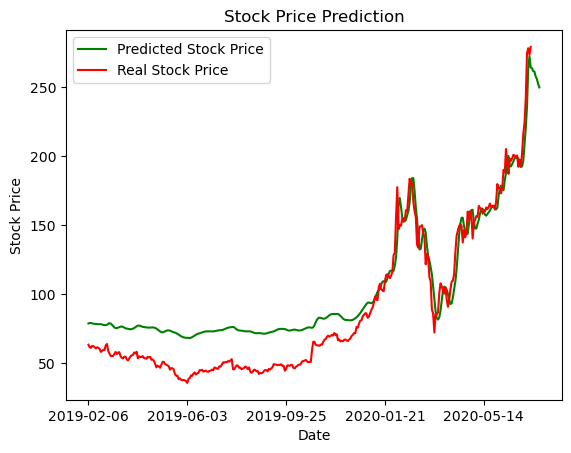

In [22]:
#Plot of prediction using model lag 7
plt.plot(date_lag7, predicted_lag7, color = "green", label = "Predicted Stock Price")
plt.plot(df_test_date, df_test, color = "red", label = "Real Stock Price") 
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.xticks(np.arange(0,x_test.shape[0],80))
plt.ylabel('Stock Price')
plt.legend()
plt.show()

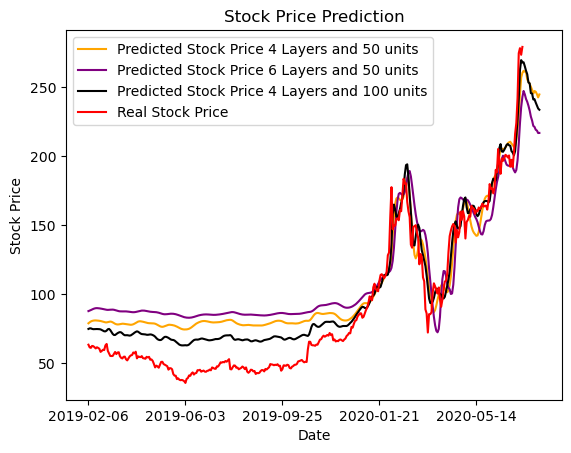

In [24]:
#Plot of prediction using models lag 14
plt.plot(date_lag14, predicted_lag14_1, color = "orange", label = "Predicted Stock Price 4 Layers and 50 units")
plt.plot(date_lag14, predicted_lag14_2, color = "purple", label = "Predicted Stock Price 6 Layers and 50 units")
plt.plot(date_lag14, predicted_lag14_3, color = "black", label = "Predicted Stock Price 4 Layers and 100 units")
plt.plot(df_test_date, df_test, color = "red", label = "Real Stock Price") 
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.xticks(np.arange(0,x_test.shape[0],80))
plt.ylabel('Stock Price')
plt.legend()
plt.show()